# Finding the Likelihood

### Introduction

Now in the last lessons, we were given the probability of an event occurring, and then from there found the probability of a sequence of independent and identically distributed events occurring.  

$P(X ) = \prod_{i = 1}^n p(x_i)$

We saw that if a random variable X can be described as a bernoulli random variable, $X \sim Ber(p)$, and we know the value of $p$, then assuming $X$ is iid, the probability of the set of events $x_i$ in $X$ occurring is:

$P(X ) =  \prod_{i = 1}^n p^{x_i}(1 - p)^{1 - x_i}$

So again, given a probability of one event occurring, we use the product rule, combined with probability density function of a bernoulli random variable, to find the probability of a sequence of events occurring. 

### Finding the likelihood

Unfortunately, in the real world, things are not normally so simple.  We generally do not start *knowing* the probability of an event.  Instead, we need to infer the probability of an event given some evidence.  This is called finding the likelihood of a parameter $\theta$.  That is we want to find the parameters that define our distribution.

### An Example

Let's say that we observe a basketball player make his first 4 of 5 shots.  Now from here, we cannot simply say that he makes 4/5 of his shots.  After all, he may just have gotten lucky.  So there are a range of possibilities for his chance of making a basketball shot.  The chances of this *probability* occurring, is called the likelihood. 

> Notice that here, we are not calculating the probability of events occurring in the future, but rather looking at past events, calculating the *likelihood* that the probability is a certain number.  


For example, let's calculate the likelihood that the basketball player makes a shot with a probability of $.2$.  If we do so, we get the following:

$L(X | \theta = .2) = .2*.2*.2*.2*.8$

In [1]:
.2*.2*.2*.2*.8

0.0012800000000000005

And we translate this procedure into a function, to calculate the likelihood of seeing given probability.

In [1]:
def likelihood(events, p):
    product = 1
    for event in events:
        if event == 1:
            product = product*(p)
        else:
            product = product*(1 - p)
    return product

In [2]:
likelihood([1, 1, 1, 1, 0], .2)

0.0012800000000000005

So the likelihood of observing our data is given a probability $p$ is the likelihood of observing the first event given the probability, times the likelihood of observing the second event, given the probability and so on.

> You may noticed, this is exactly the same formula that we saw in calculating the probability.

$f(X|\theta) = \prod_{i = 1}^n p(x_i | \theta) $

The sole difference, is that instead of being given the probability and calculating the probability of future events, here we are given past events, and calculating the likelihood of a given value of $\theta$.

### Finding the maximum likelihood

Next, let's calculate the likelihood of different probabilities, given the evidence.  This will then allow us to find the probability that is most likely to be occurring.  Let's do it.

We'll start by creating a list of different probabilities.

In [3]:
import numpy as np
probs = .05*np.arange(0, 21)
probs

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

Then we'll calculate the likelihood of each of them, assuming the same event sequence of making four shots in a row.

In [4]:
likelihoods = [likelihood([1, 1, 1, 1, 0], p) for p in probs]

In [6]:
likelihoods[:3]

[0.0, 5.937500000000002e-06, 9.000000000000003e-05]

We can see this better, by plotting our various likelihoods.

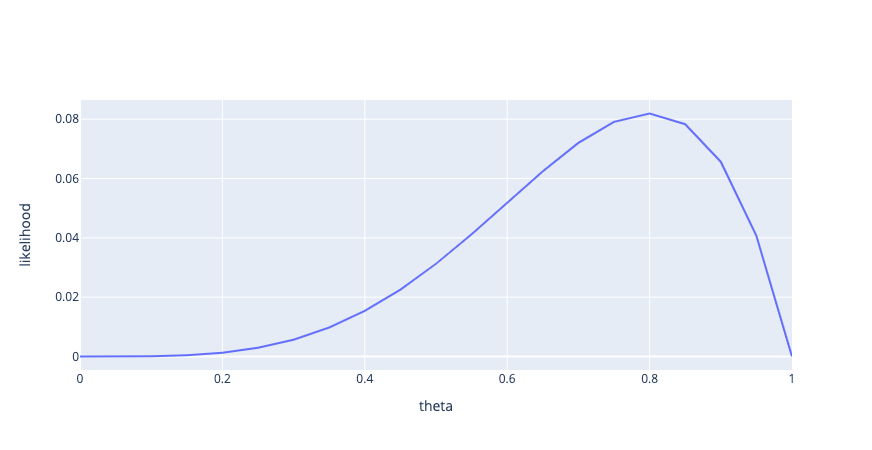

In [15]:
import plotly.graph_objects as go
scatter = go.Scatter(x = probs, y = likelihoods)
layout = {'title': '$L(X|p),   X = [1, 1, 1, 1, 0]$', 'xaxis': {'title': 'theta '}, 'yaxis': {'title': 'likelihood'}}
go.Figure(scatter,  layout = layout)

So as you can see, with likelihood we try to find the chance that a given probability occurs.  And we try out different probabilities to calculate the chance of each, given what we observed.

Or from Wikipedia: 

> In other words, when $f(x|\theta )$ is viewed as a function of $x$ **with $\theta$  fixed**, it is a probability density function, and when viewed as a function of $\theta$  **with $x$ fixed**, it is a likelihood function.

- [Likelihood Wikipedia](https://en.wikipedia.org/wiki/Likelihood_function#Likelihood_function_of_a_parameterized_model)

So the key is that our evidence, $X$ stays fixed, and we evaluate the likelihood of different values of $p$.  The *maximum likelihood* is the value of theta that yields the highest likehood given the evidence.

$\theta_{MLE} = \underset {\theta}{argmax} = \prod_{i = 1}^n P(x_i|\theta)$

And for a bernoulli random variable, $X_i \sim Ber(\theta)$, then :

$\theta_{MLE} = \underset {\theta}{argmax} \prod_{i = 1}^n \theta^{x_i}(1 - \theta)^{1 - x_i}$

> We substitute p for $\theta$, as that is the relevant parameter in a bernoulli random variable.

### Summary

In this lesson, we learned about the likelihood.  We saw that the likelihood is the chance of a given probability, given our evidence.  We saw that we can calculate the likelihood of different probabilities, and then plot our likelihood of each probability.  In the next lesson, we'll move onto calculating the maximum likelhood.